In [2]:
#sample starts here
#Swarup 

from sklearn import tree
from dtreeviz.trees import *
from sklearn.datasets import load_boston

boston = load_boston()

X_train = boston.data
y_train = boston.target
testX = X_train[7,:]

regr = tree.DecisionTreeRegressor(max_depth=3)
regr = regr.fit(X_train, y_train)



In [7]:
viz = dtreeviz(regr, X_train, y_train, target_name='price',
               feature_names=boston.feature_names,
               X = X_train[10,:])
viz.view()

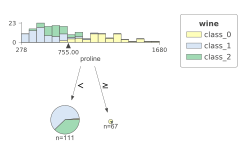

In [2]:
from sklearn.datasets import load_wine

clf = tree.DecisionTreeClassifier(max_depth=1)
wine = load_wine()

clf.fit(wine.data, wine.target)

testX = wine.data[np.random.randint(0, len(wine.data)),:]
testX=None

viz = dtreeviz(clf, wine.data, wine.target, target_name='wine',
              feature_names=wine.feature_names,
              class_names=list(wine.target_names),
              X=testX)
viz

# Single-var regression

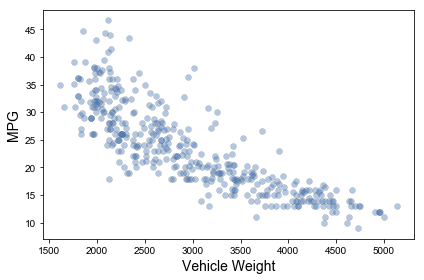

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_cars = pd.read_csv("data/cars.csv")
X = df_cars[['WGT']]
y = df_cars['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

from matplotlib import rcParams

rcParams['font.family'] = 'Arial'
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4',
                edgecolor=GREY, lw=.3)

plt.xlabel("Vehicle Weight", fontsize=14)
plt.ylabel("MPG", fontsize=14)
plt.tight_layout()
plt.savefig("/tmp/cars-wgt-vs-mpg.svg", bbox_inches=0, pad_inches=0)

In [4]:
# from dtreeviz.trees import rtreeviz
# rtreeviz(X_train, y_train, max_depth=2, feature_name='Vehicle Weight', target_name='MPG')

In [5]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.7776055718118629


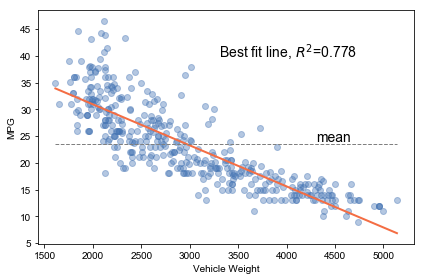

In [6]:
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')
overall_feature_range = (np.min(X.values), np.max(X.values))
X_line = np.arange(overall_feature_range[0], overall_feature_range[1], 1).reshape(-1,1)
y_line = lm.predict(X_line)
plt.plot(X_line, y_line, color='#f46d43', lw=2)
plt.plot(overall_feature_range,[np.mean(y),np.mean(y)],'--', color='grey', linewidth=1)
plt.text(3300,40,f"Best fit line, $R^2$={lm.score(X_test,y_test):.3f}", fontsize=14)
plt.text(4300,24,"mean",fontsize=14)
plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")
plt.tight_layout()
plt.savefig("/tmp/linear-model.svg", bbox_inches=0, pad_inches=0)

In [7]:
depth = 4
t = tree.DecisionTreeRegressor(max_depth=depth)
t.fit(X_train,y_train)
t.score(X_test,y_test)

0.6387583757083399

In [8]:
viz = dtreeviz(t, X, y, target_name='MPG', feature_names=['WGT'])
viz

In [9]:
y_range = (min(y), max(y)) # same y axis for all
overall_feature_range = (np.min(X.values), np.max(X.values))

shadow_tree = ShadowDecTree(t, X, y, feature_names=['WGT'])
splits = []
for node in shadow_tree.internal:
    splits.append( node.split() )
splits = sorted(splits)
bins = [overall_feature_range[0]] + splits + [overall_feature_range[1]]
bins

[1613,
 2105.0,
 2116.5,
 2124.5,
 2217.0,
 2398.0,
 2737.5,
 3009.0,
 3018.0,
 3220.5,
 3267.5,
 3390.0,
 3657.5,
 3975.0,
 4361.5,
 4715.5,
 5140]

In [10]:
wgt = X.WGT
means = []
for i in range(len(bins)-1):
    left = bins[i]
    right = bins[i+1]
    inrange = y[(wgt>=left) & (wgt<right)]
    
    means.append( np.mean(inrange) )
means

[33.1474573559322,
 37.133332333333335,
 26.033332666666666,
 31.74137931034483,
 27.13243264864865,
 25.90175436842105,
 22.671052657894734,
 31.0,
 19.4950001,
 22.97142871428571,
 18.766666666666666,
 18.318750187499997,
 16.332142892857142,
 14.805882352941175,
 13.25,
 11.75]

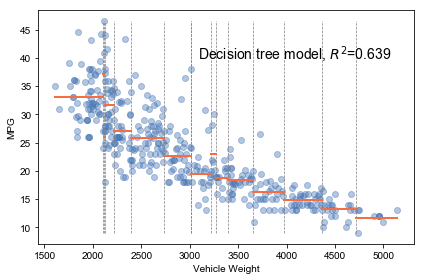

In [11]:
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')

for split in splits:
    plt.plot([split,split],[*y_range],'--', color='grey', linewidth=.7)

prevX = overall_feature_range[0]
for i,m in enumerate(means):
    split = overall_feature_range[1]
    if i<len(splits):
        split = splits[i]        
    plt.plot([prevX,split],[m,m],'-', color='#f46d43', linewidth=2)
    prevX = split

plt.text(3090,40,f"Decision tree model, $R^2$={t.score(X_test,y_test):.3f}", fontsize=14)

plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")
plt.tight_layout()
plt.savefig(f"/tmp/dectree-depth-{depth}.svg", bbox_inches=0, pad_inches=0)

# Try single-var classification

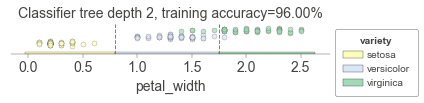

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train = iris.data
y_train = iris.target
class_names = ["setosa", "versicolor", "virginica"]
petal_width = X_train[:,3]
petal_width

figsize = (6,1.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)

max_depth = 2
ctreeviz_univar(ax, petal_width, y_train, max_depth=max_depth, feature_name = 'petal_width',
         class_names=["setosa", "versicolor", "virginica"],
                target_name='variety',
         gtype='strip',
         nbins=55)
plt.tight_layout()
plt.savefig(f"/tmp/iris-classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()

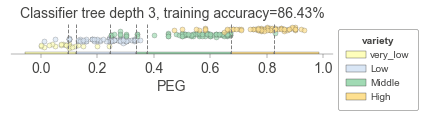

In [13]:
know = pd.read_csv("data/knowledge.csv")
class_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

max_depth=3
x_train = know.PEG
y_train = know['UNS']
figsize = (6,1.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ctreeviz_univar(ax, x_train, y_train, max_depth=max_depth, feature_name = 'PEG',
                target_name='variety',
                     class_names=class_names, nbins=40, gtype='strip')
plt.tight_layout()
plt.savefig(f"/tmp/knowlege-classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()

In [14]:
import numpy as np
x = np.arange(1, 5)
y = np.arange(1, 5)
print(x, y)
print()
X, Y = np.meshgrid(x, y)
print(X)
print()
print(Y)

R = np.sqrt(X**2 + Y**2)

print()
print(R)

[1 2 3 4] [1 2 3 4]

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]

[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]

[[1.41421356 2.23606798 3.16227766 4.12310563]
 [2.23606798 2.82842712 3.60555128 4.47213595]
 [3.16227766 3.60555128 4.24264069 5.        ]
 [4.12310563 4.47213595 5.         5.65685425]]


In [15]:
from colour import Color
colors = list(Color("red").range_to(Color("green"), 100))
i = int(round(20.3))
c = colors[i]
str(c)

'#e55d00'

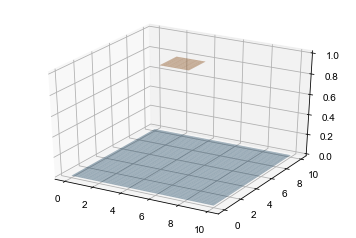

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

point2 = np.array([10, 50, 50])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(np.linspace(0,10,100), np.linspace(0,10,100))

# calculate corresponding z
z = np.zeros_like(xx)

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.4)

xx, yy = np.meshgrid(np.linspace(4,6,10), np.linspace(4,6,10))
z = np.ones_like(xx)
plt3d.plot_surface(xx, yy, z, alpha=0.4)

plt.show()

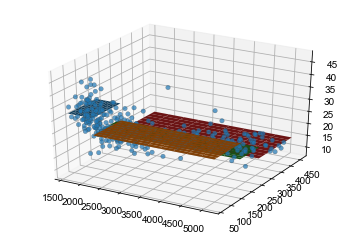

In [17]:
def plane(node,bbox):
    x = np.linspace(bbox[0],bbox[2],10)
    y = np.linspace(bbox[1],bbox[3],10)
    xx, yy = np.meshgrid(x,y)
    z = np.zeros_like(xx)
    z[:,:] = node.prediction()
    ax.plot_surface(xx, yy, z, alpha=1)

df_cars = pd.read_csv("data/cars.csv")
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']

feature_names=['A','B']
features=[2,1]
fig = plt.figure()
ax = fig.gca(projection='3d')

max_depth=2
X = X.iloc[:,features] # use just these features
rt = tree.DecisionTreeRegressor(max_depth=max_depth)
rt.fit(X, y)

y_lim = np.min(y), np.max(y)
y_range = y_lim[1] - y_lim[0]
#color_map = list(str(c) for c in Color("red").range_to(Color("green"), 100))

shadow_tree = ShadowDecTree(rt, X, y, feature_names=feature_names)

tesselation = shadow_tree.tesselation()
for node,bbox in tesselation:
    plane(node,bbox)

x, y, z = X.values[:,0], X.values[:,1], y
xx, yy = np.meshgrid(x, y)
ax.scatter(x, y, z, marker='o', alpha=.7, edgecolor=GREY, lw=.3)

plt.show()

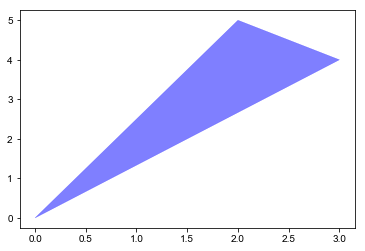

In [18]:
x = [0,3,2]
y = [0,4,5]
plt.fill(x,y,c='blue',alpha=.5,edgecolor='grey',lw=.3)

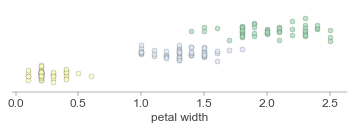

In [32]:
fig, ax = plt.subplots(1, 1, figsize=figsize)

iris = load_iris()
X_train = iris.data
y_train = iris.target
class_names = ["setosa", "versicolor", "virginica"]
x_train = X_train[:,3]
feature_name = 'petal width'
fontsize=12

ct = tree.DecisionTreeClassifier(max_depth=max_depth)
ct.fit(x_train.reshape(-1, 1), y_train)

shadow_tree = ShadowDecTree(ct, x_train.reshape(-1, 1), y_train,
                            feature_names=[feature_name], class_names=class_names)

n_classes = shadow_tree.nclasses()
overall_feature_range = (np.min(x_train), np.max(x_train))
class_values = shadow_tree.unique_target_values

color_values = color_blind_friendly_colors[n_classes]
colors = {v: color_values[i] for i, v in enumerate(class_values)}
X_colors = [colors[cl] for cl in class_values]

ax.set_xlabel(f"{feature_name}", fontsize=fontsize, fontname="Arial",
              color=GREY)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.3)

r = overall_feature_range[1] - overall_feature_range[0]

dot_w = 25

X_hist = [x_train[y_train == cl] for cl in class_values]
# user should pass in short and wide fig
sigma = .02
mu = .1
class_step = .12
ax.set_ylim(0, mu + n_classes*class_step)
for i, h in enumerate(X_hist):
    y_noise = np.random.normal(mu+i*class_step, sigma, size=len(h))
    ax.scatter(h, y_noise, alpha=.7, marker='o', s=dot_w, c=colors[i],
               edgecolors=GREY, lw=.3)

ax.tick_params(axis='both', which='major', width=.3, labelcolor=GREY,
               labelsize=fontsize)
plt.show()

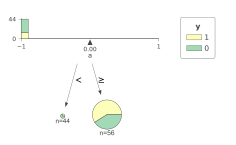

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import dtreeviz

x = np.random.choice([-1,1], size=(100,2))
y = np.random.choice([0,1], size=100)

dtreeviz(
    tree_model=DecisionTreeClassifier(max_depth=1).fit(x, y),
    X_train=x,
    y_train=y,
    feature_names=['a','b'],
    target_name='y',
    class_names=[1,0]
)